In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

# Establish connection to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="edi_clinicaltrials",
    user="ediuser",
    password="12345"
)

def run_query(query):
    return pd.read_sql(query, conn)


In [2]:
query = "SELECT id, nct_id, title, brief_summary, overall_status, study_type, updated_date FROM studies LIMIT 20;"
studies_df = run_query(query)
studies_df.head()


/tmp/ipykernel_9138/1113690414.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,id,nct_id,title,brief_summary,overall_status,study_type,updated_date
0,1,NCT06809725,Software Validation Study-Cognitive Status Ind...,The SPARK Cognitive Status Indicator software ...,Not yet recruiting,Interventional,2025-02-28
1,2,NCT06800183,Topical Tartrazine for Improved Skin Structure...,The goal of this clinical trial is to learn if...,Not yet recruiting,Interventional,2025-02-28
2,3,NCT06800079,Elastic Band Training Effects on Knee Strength...,The goal of this clinical trial is to assess t...,Recruiting,Interventional,2025-02-28
3,4,NCT06800261,Clinical Trial of PCV24 in Infants Aged 2-23 M...,A Phase 1b clinical trial of 24-valent pneumoc...,Not yet recruiting,Interventional,2025-02-28
4,5,NCT06808750,Performance of Tests for Schistosoma Haematobi...,Urogenital schistosomiasis caused by infection...,Not yet recruiting,Observational,2025-02-28


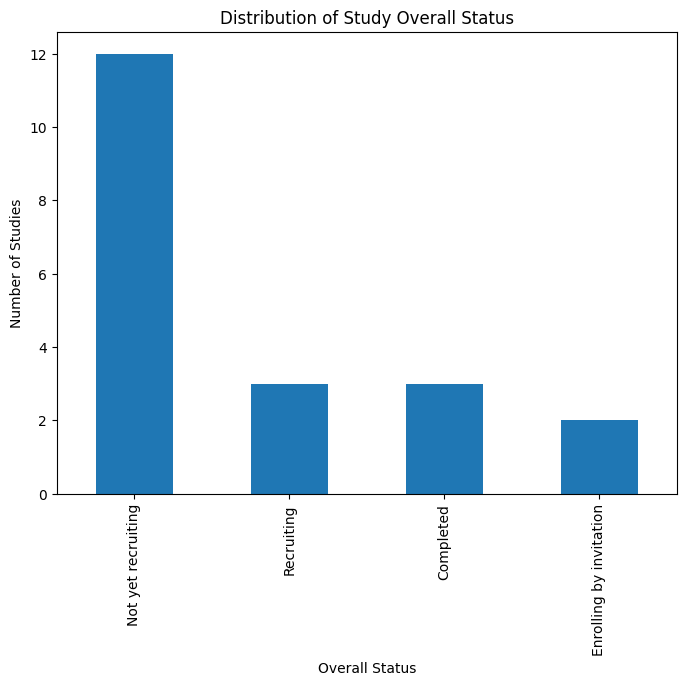

In [3]:
status_counts = studies_df['overall_status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.title('Distribution of Study Overall Status')
plt.xlabel('Overall Status')
plt.ylabel('Number of Studies')
plt.show()


In [4]:
sponsors_query = "SELECT study_id, sponsor_name, sponsor_type FROM sponsors;"
sponsors_df = run_query(sponsors_query)

merged_df = pd.merge(studies_df, sponsors_df, left_on='id', right_on='study_id', how='left')
merged_df.head()


/tmp/ipykernel_9138/1113690414.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,id,nct_id,title,brief_summary,overall_status,study_type,updated_date,study_id,sponsor_name,sponsor_type
0,1,NCT06809725,Software Validation Study-Cognitive Status Ind...,The SPARK Cognitive Status Indicator software ...,Not yet recruiting,Interventional,2025-02-28,1,Spark Neuro Inc.,Industry
1,2,NCT06800183,Topical Tartrazine for Improved Skin Structure...,The goal of this clinical trial is to learn if...,Not yet recruiting,Interventional,2025-02-28,2,Johns Hopkins University,Other
2,3,NCT06800079,Elastic Band Training Effects on Knee Strength...,The goal of this clinical trial is to assess t...,Recruiting,Interventional,2025-02-28,3,Henrique Sousa,Other
3,4,NCT06800261,Clinical Trial of PCV24 in Infants Aged 2-23 M...,A Phase 1b clinical trial of 24-valent pneumoc...,Not yet recruiting,Interventional,2025-02-28,4,"Sinovac Life Sciences Co., Ltd.",Industry
4,5,NCT06808750,Performance of Tests for Schistosoma Haematobi...,Urogenital schistosomiasis caused by infection...,Not yet recruiting,Observational,2025-02-28,5,Stefanie Knopp,Other
